# Example Gameplay

In [377]:
from qiskit import *
import numpy as np

### Initialise matrix

In [378]:
matrix = np.zeros((4, 4))
matrix.fill(-1)
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]])

### Initialise circuit

We initialise a circuit with 4 qubits corresponding to the 4 slots / 4 columns of the gameboard. We then start the game by initialising the bottom row to alternating 0s and 1s. The need to do this arises because measurement of the circuit at any time should give the coins at the top-most filled position of each slot. Since the circuit can't be initialised to nothing, we intialise the game with alternating 0s and 1s to reduce bias

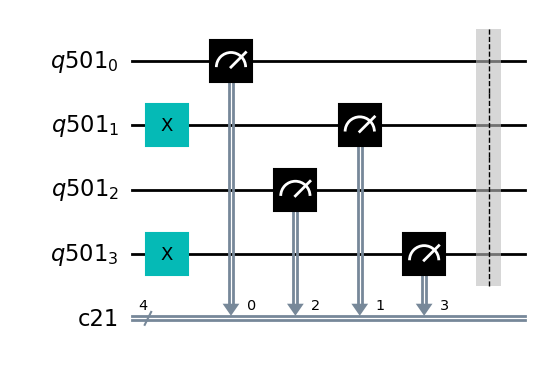

In [379]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

for i in range(1, 4, 2):
    qc.x(qr[i])

for i in range(4):
    qc.measure(qr[i], cr[i])

qc.barrier()
# update matrix
matrix[-1, 1] = 1
matrix[-1, 3] = 1
matrix[-1, 0] = 0
matrix[-1, 2] = 0
qc.draw(output='mpl')

In [380]:
def execution(qc, shots=1):
    job = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots)
    result = job.result()
    print(result.get_counts(qc))

In [381]:
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

In [382]:
execution(qc)

{'1010': 1}


### Player 0: plays first slot (q0)

In [383]:
matrix[2][0] = 0
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0., -1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

Since q0 is already 0, we simply need to measure it

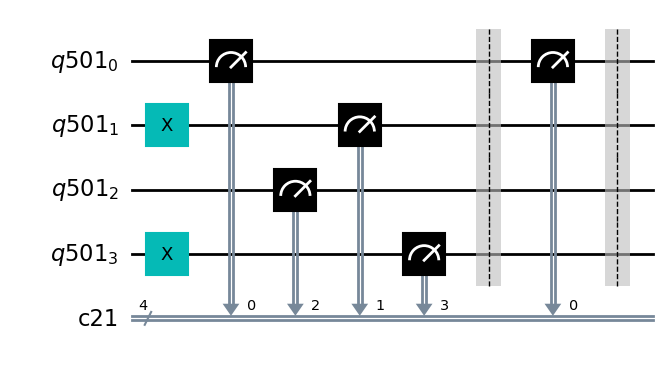

In [384]:
qc.measure(qr[0], cr[0])
qc.barrier()
qc.draw(output='mpl')

In [385]:
execution(qc)

{'1010': 1}


### Player 1: Adds NOT Gate on second slot (q1)

This NOT gate should not be visible to Player 0 yet. He will realise only when he runs a play on q1 and coin 1 is added instead of coin 0. Therefore, we do not measure the circuit after this gate is added

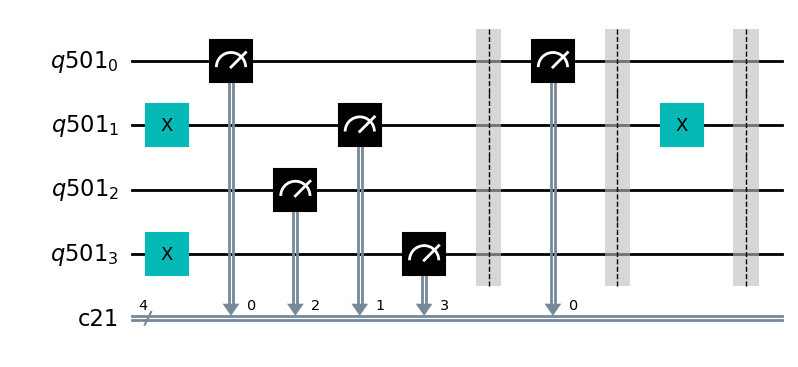

In [386]:
# not gate added by player 1
qc.x(qr[1])
qc.barrier()
qc.draw(output='mpl')

### Player 0: plays second slot (q1)

Since he cannot see the NOT gate added by player 0, he feels that the current top value of the second slot is 1. Therefore, he adds a NOT gate to add his 0

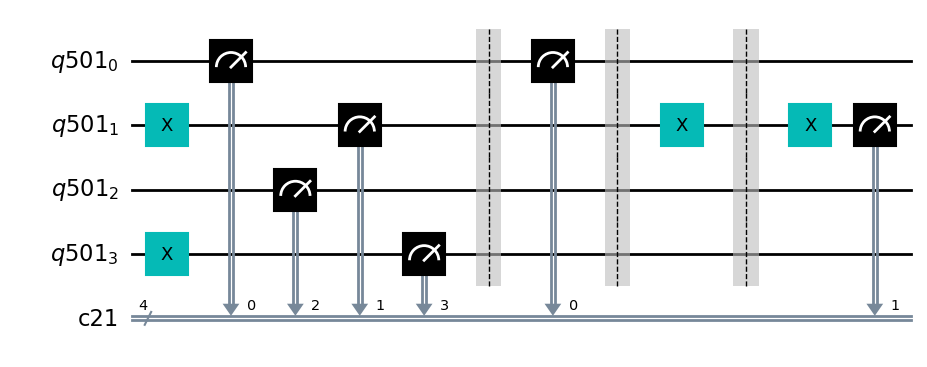

In [387]:
# move of player 0
qc.x(qr[1])
qc.measure(qr[1], cr[1])
qc.draw(output='mpl')

However, due to the presence of the NOT gate secretly added by player 1, he adds the coin 1 instead of 0. This can be seen in the measurement below

In [388]:
execution(qc)

{'1010': 1}


In [389]:
matrix[2][1] = 1
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  1., -1., -1.],
       [ 0.,  1.,  0.,  1.]])

### Nullify the gate to normalize the slot by adding another NOT gate

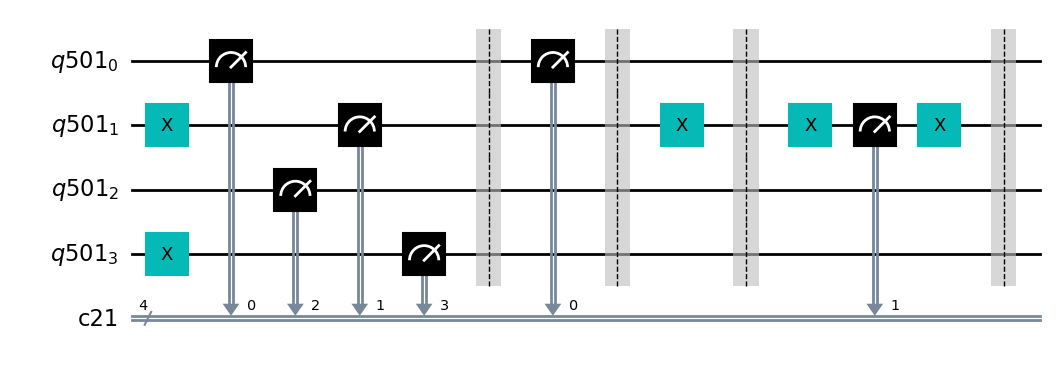

In [390]:
qc.x(qr[1])

qc.barrier()
qc.draw(output='mpl')

### Player 1: plays fourth slot (q3)

Since the top-most value of q3 is already 1, he simply measures

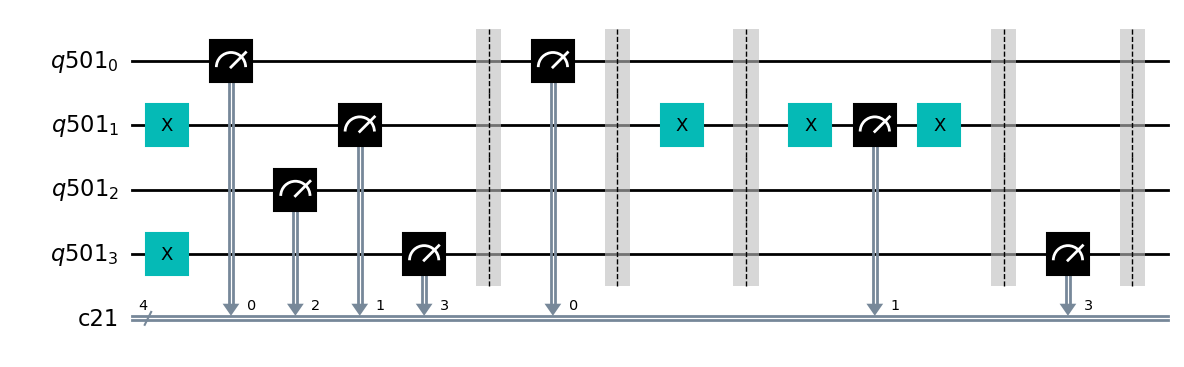

In [391]:
qc.measure(qr[3], cr[3])
qc.barrier()
qc.draw(output='mpl')

In [392]:
execution(qc)

{'1010': 1}


In [393]:
matrix[2][3] = 1
matrix

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  1., -1.,  1.],
       [ 0.,  1.,  0.,  1.]])

### Player 0: Applies Hadamard gate on column 1 (q0)

Again, no measurement is carried out after application of the gate to maintain secrecy

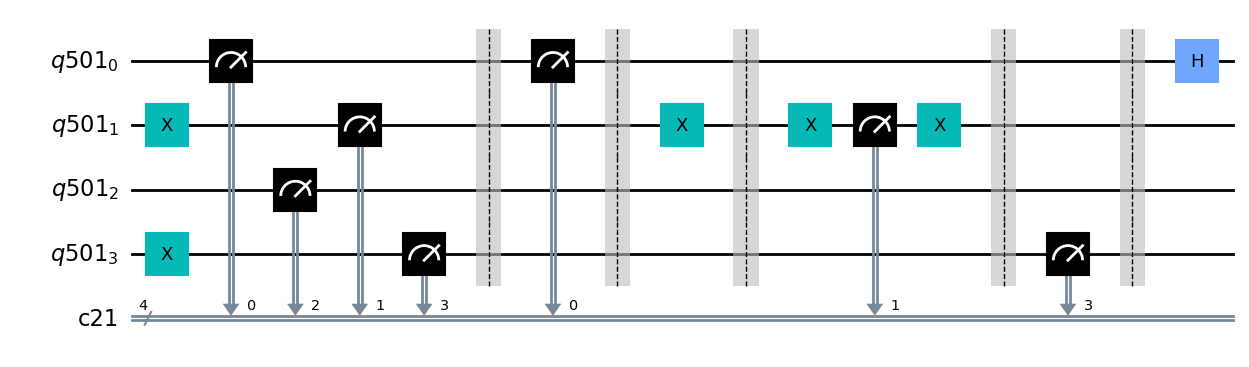

In [394]:
# gate applied by player 0
qc.h(qr[0])
qc.draw(output='mpl')

### Player 1: plays column 1 (q0)

Since the top-most value is 0, we add a NOT gate and measure

{'1011': 1}


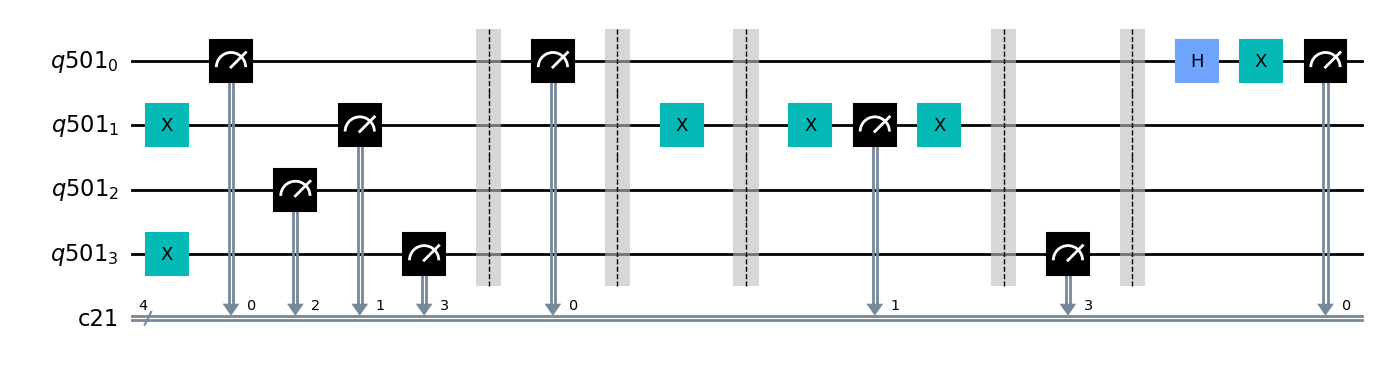

In [395]:
# move of player 1
qc.x(qr[0])
qc.measure(qr[0], cr[0])

execution(qc, 1)
qc.draw(output='mpl')

In [401]:
matrix[1][0] = 1
matrix

array([[-1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 0.,  1., -1.,  1.],
       [ 0.,  1.,  0.,  1.]])

Fortunately, he finds that he has added coin 1 even though there was a chance that the superposition could collapse on coin 0. This was because of the superposition introduced by the hadamard gate

Now, to ensure that the superposition does not collapse into a different value each time the circuit is run, we initialise q0 to $\ket{1}$

/home/malhaar/cs/quantum/quantum-connect-4/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


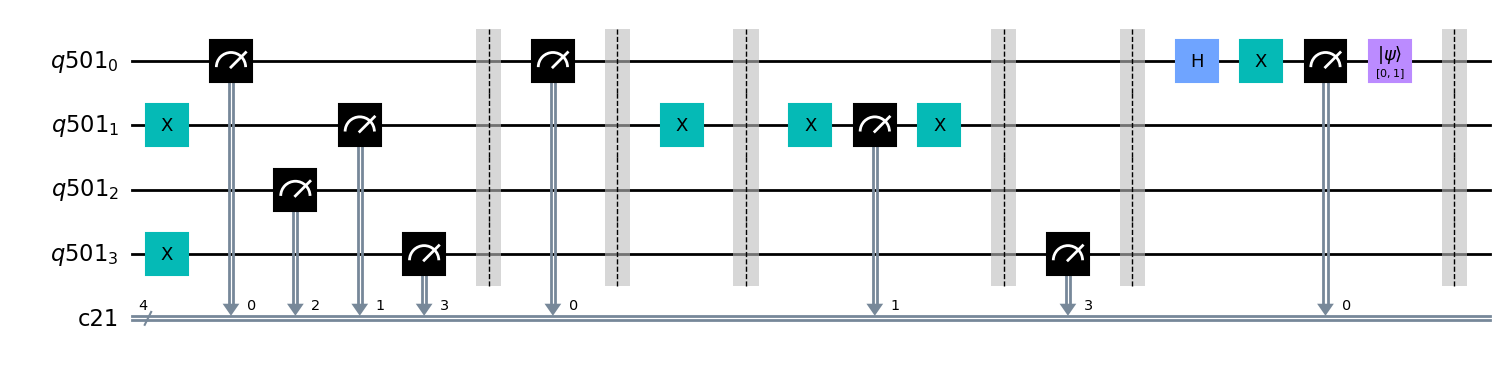

In [402]:
qc.initialize([0, 1], 0)
qc.barrier()
qc.draw(output='mpl')

In [403]:
qc.measure(qr[0], cr[0])
qc.barrier()
execution(qc, 1000)

{'1011': 1000}


As we can see, q0 is always 1 due to the initialization

### Player 0: adds a swap gate on slot 1 (q0) and slot 3 (q2)

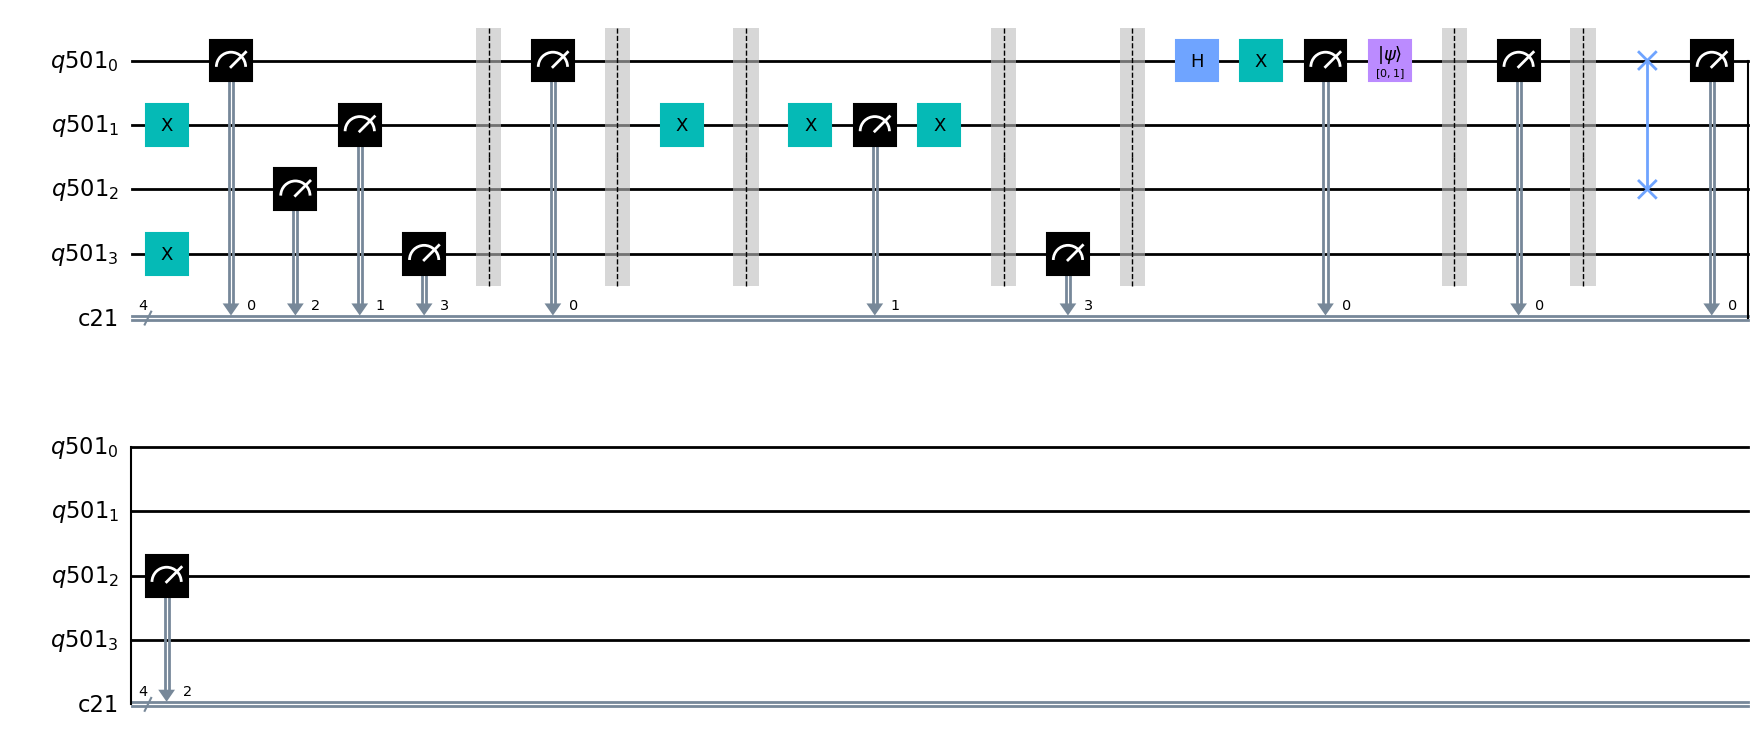

In [404]:
# player 0: swap gate on q0 and q2
qc.swap(qr[0], qr[2])
qc.measure(qr[0], cr[0])
qc.measure(qr[2], cr[2])
qc.draw(output='mpl')

In [405]:
execution(qc)

{'1110': 1}


In [406]:
matrix[1][0] = 0
matrix[3][2] = 1
matrix

array([[-1., -1., -1., -1.],
       [ 0., -1., -1., -1.],
       [ 0.,  1., -1.,  1.],
       [ 0.,  1.,  1.,  1.]])

As we can see, the values have been swapped

### Player 1: Adds a rotation gate

This gate would ensure that player 0's next play at the $i^{th}$ slot is added to the $n-i^{th}$ slot instead. This is enforced manually and not implemented in the circuit

### Player 0: plays slot 1 (q0) but ends up adding to slot 4 (q3) because of rotation gate

/home/malhaar/cs/quantum/quantum-connect-4/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


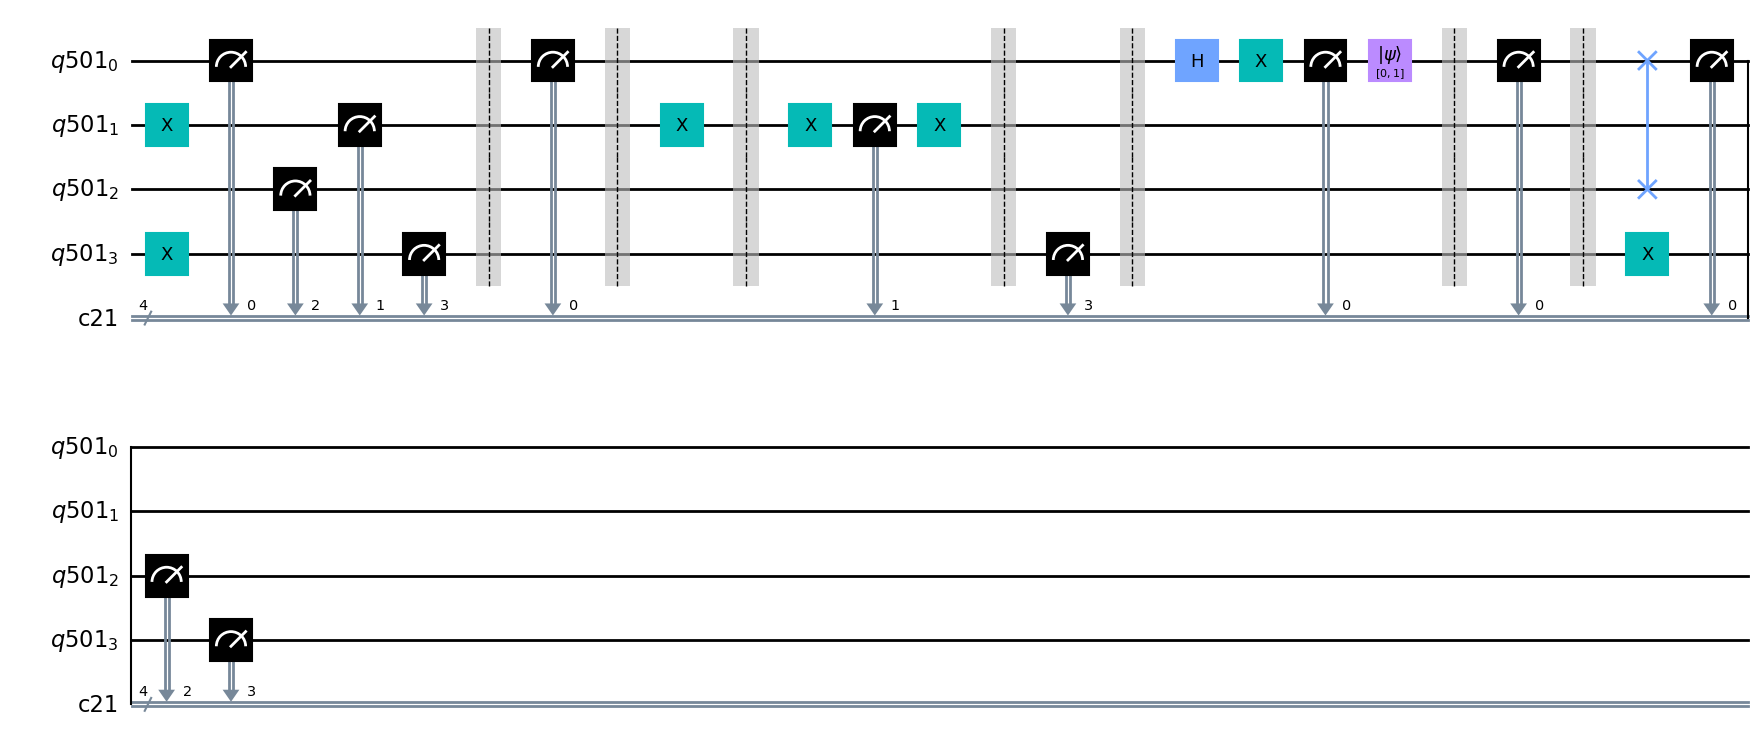

In [407]:
# player 0: q0
qc.x(qr[3-0])
qc.measure(qr[3], cr[3])
qc.draw(output='mpl')

In [408]:
execution(qc)

{'0110': 1}


In [409]:
matrix[1][3] = 0
matrix

array([[-1., -1., -1., -1.],
       [ 0., -1., -1.,  0.],
       [ 0.,  1., -1.,  1.],
       [ 0.,  1.,  1.,  1.]])